# (Bike Sharing Analysis with Ford GoBike Data2017 version)
## by (Osama Ismael)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [4]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer


In [6]:
print(df.shape)
print(df.dtypes)

(519700, 13)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object


In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


### What is the structure of your dataset?

> there are 519700 rides in this datasit with 13 features (ride_id,rideable_type,started_at,ended_at,start_station_name,
  start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual) 

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features affect number of riders

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> i guess start_station_name , end_station_name ,  user_type would have the most effect 

## Clean data

In [8]:
# Convert time from object(string) to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

## Univariate Exploration

### which type uses the most?

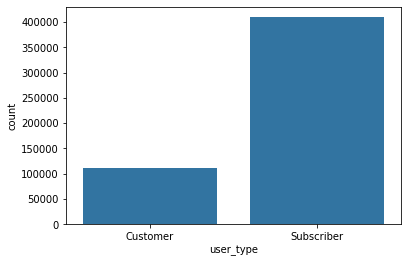

In [9]:
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type' , color =default_color)

as we can see subscribers use more bikes than costumers 

### which bikes rented the most?

Text(0.5, 0, 'bike_id')

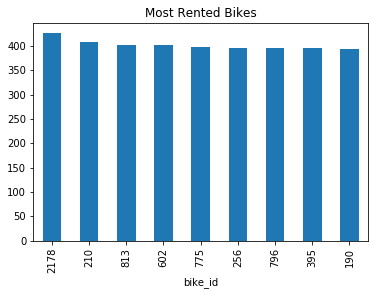

In [10]:
df['bike_id'].value_counts()[1:10].plot(kind='bar')
plt.title('Most Rented Bikes')
plt.xlabel ('bike_id')

### in which day do people like to rent bikes?

In [13]:
df['start_time_day'] = df['start_time'].dt.day.astype(int)

Text(0, 0.5, 'day')

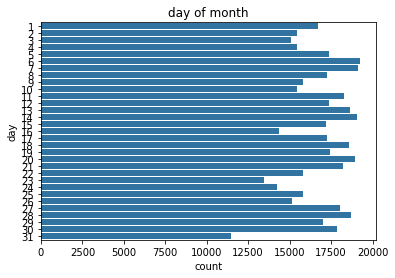

In [19]:
default_color = sb.color_palette()[0]
sb.countplot(data = df,y = 'day', color = default_color)
plt.title('day of month')
plt.ylabel ('day')

### in which month do people like to rent bikes?

In [15]:
df['start_time_month'] = df['start_time'].dt.month.astype(int)

Text(0, 0.5, 'Month')

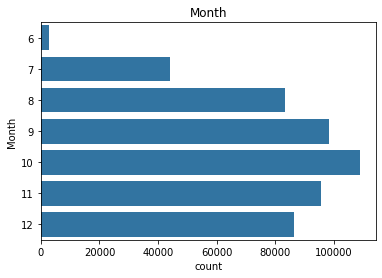

In [20]:
default_color = sb.color_palette()[0]
sb.countplot(data = df,y = 'start_time_month', color = default_color)
plt.title('Month')
plt.ylabel ('Month')

rent count increases in 9,10,11

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

Text(0.5, 0, 'Duration (min)')

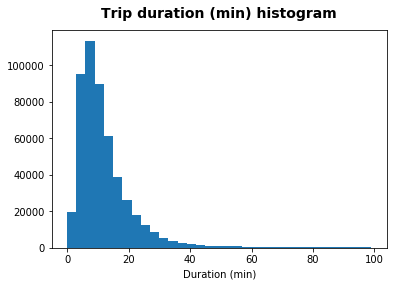

In [23]:
df['duration_min'] = df['duration_sec'] / 60
plt.hist(data = df, x = 'duration_min', bins = np.arange(0, 100,3));
plt.title("Trip duration (min) histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Duration (min)')

### where was the most rented bikes?

Text(0.5, 1.0, 'Most Rented Bikes')

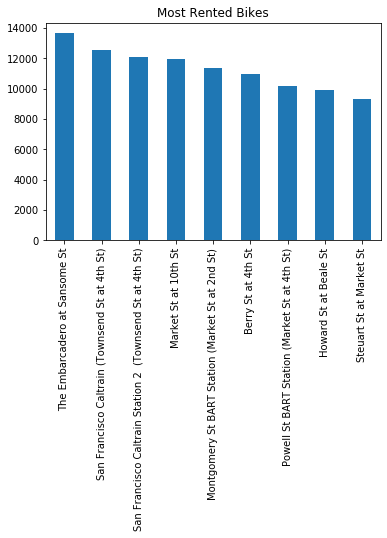

In [40]:
df['start_station_name'].value_counts()[1:10].plot(kind='bar')
plt.title('Most Rented Bikes')

### does the day of week has an effect?

In [25]:
df['day_of_week'] = df['start_time'].dt.day_name()
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,day,start_time_day,start_time_month,duration_min,day_of_week
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,31,31,12,1335.166667,Sunday
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,31,31,12,1313.333333,Sunday
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,31,31,12,762.800000,Sunday
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,31,31,12,1036.200000,Sunday
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,31,31,12,726.716667,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519695,435,2017-06-28 10:00:54.528,2017-06-28 10:08:10.438,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber,28,28,6,7.250000,Wednesday
519696,431,2017-06-28 09:56:39.631,2017-06-28 10:03:51.090,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber,28,28,6,7.183333,Wednesday
519697,424,2017-06-28 09:47:36.347,2017-06-28 09:54:41.187,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber,28,28,6,7.066667,Wednesday
519698,366,2017-06-28 09:47:41.664,2017-06-28 09:53:47.715,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber,28,28,6,6.100000,Wednesday


Text(0.5, 0, 'day')

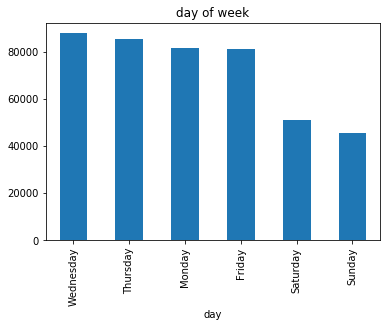

In [26]:
df['day_of_week'].value_counts()[1:10].plot(kind='bar')
plt.title('day of week')
plt.xlabel ('day')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> subscribers use the services more than customers and this was ecpected as subscribers have copuns and sales.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes i made new columns like day of week and extract day

## Bivariate Exploration

### Does day affect trip duration?

Text(0, 0.5, 'Trip Duration in Minutes')

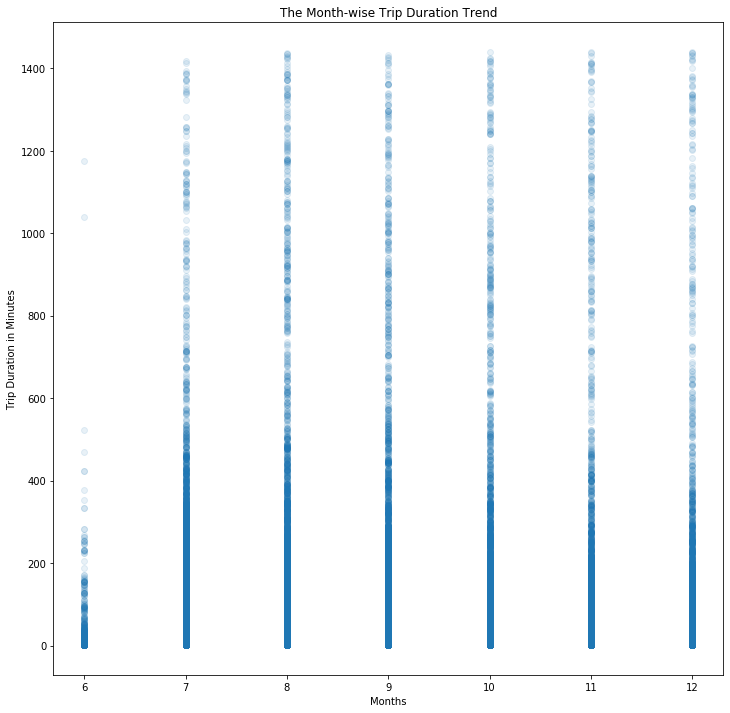

In [28]:
plt.figure(figsize = [12,12])
plt.scatter(data = df , x = 'start_time_month' , y = 'duration_min' , alpha = 0.1 )
plt.title('The Month-wise Trip Duration Trend')
plt.xlabel('Months')
plt.ylabel('Trip Duration in Minutes')

We see that hotter months are less to use service

Text(0, 0.5, 'Trip Duration in Minutes')

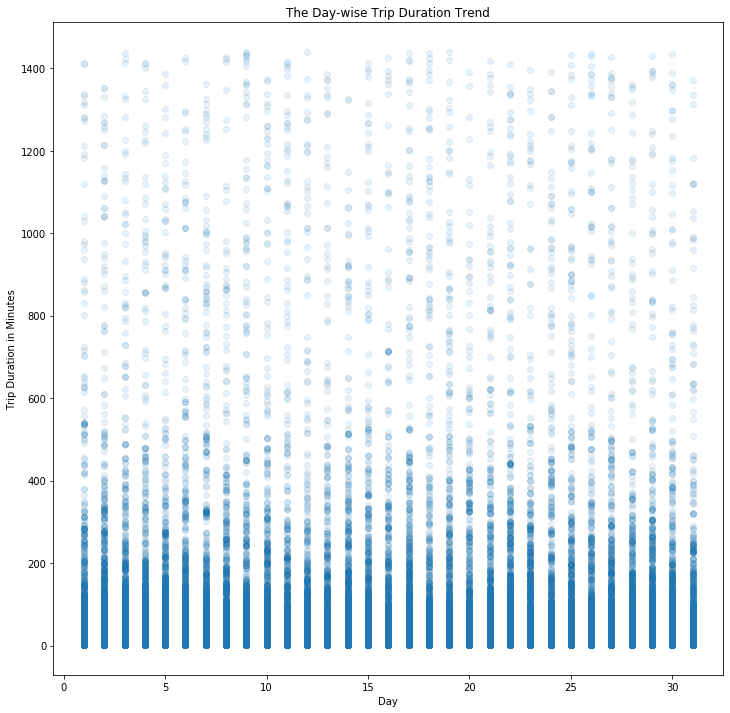

In [29]:
plt.figure(figsize = [12,12])
plt.scatter(data = df , x = 'day' , y = 'duration_min' , alpha = 0.1 )
plt.title('The Day-wise Trip Duration Trend')
plt.xlabel('Day')
plt.ylabel('Trip Duration in Minutes')

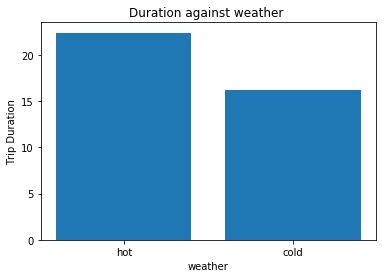

In [31]:
#We categorize our months for two categories; hot and cold
hot = df.query('start_time_month in ["6" , "7" , "8"]' ).duration_min.mean ()
cold = df.query('start_time_month in ["10" , "11" , "12"] ').duration_min.mean()

plt.bar(['hot','cold'],[hot , cold] )
plt.title('Duration against weather ')
plt.xlabel('weather')
plt.ylabel('Trip Duration');

we can see that the day has no affection

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> we can see that hot months has longer trip duration than cold ones

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> yes weather 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [32]:
df['duration_min'] = df['duration_min'].astype(int)

In [34]:
correlation = pd.DataFrame(df, columns = ['duration_sec', 'start_time_month', 'start_station_longitude', 'end_station_longitude'])

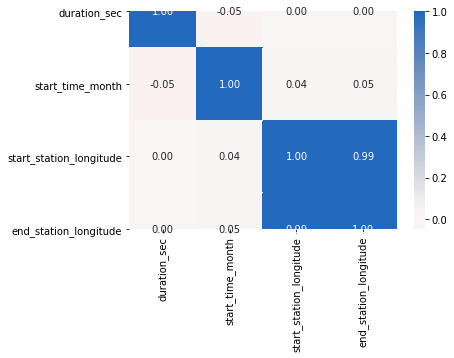

In [35]:
sb.heatmap(correlation.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

we can see correlation between start station longitude and end station longitude

### the affection of  user type on duration per month  

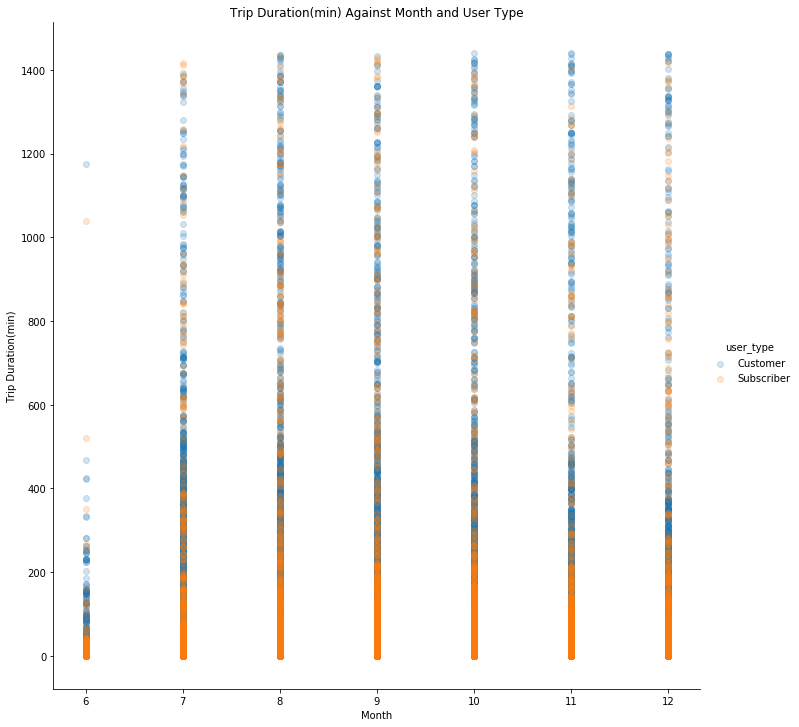

In [37]:
g = sb.FacetGrid(data = df, hue = 'user_type', height = 10)
g.map(plt.scatter, 'start_time_month','duration_min', alpha = 0.2)
g.add_legend()
plt.title('Trip Duration(min) Against Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

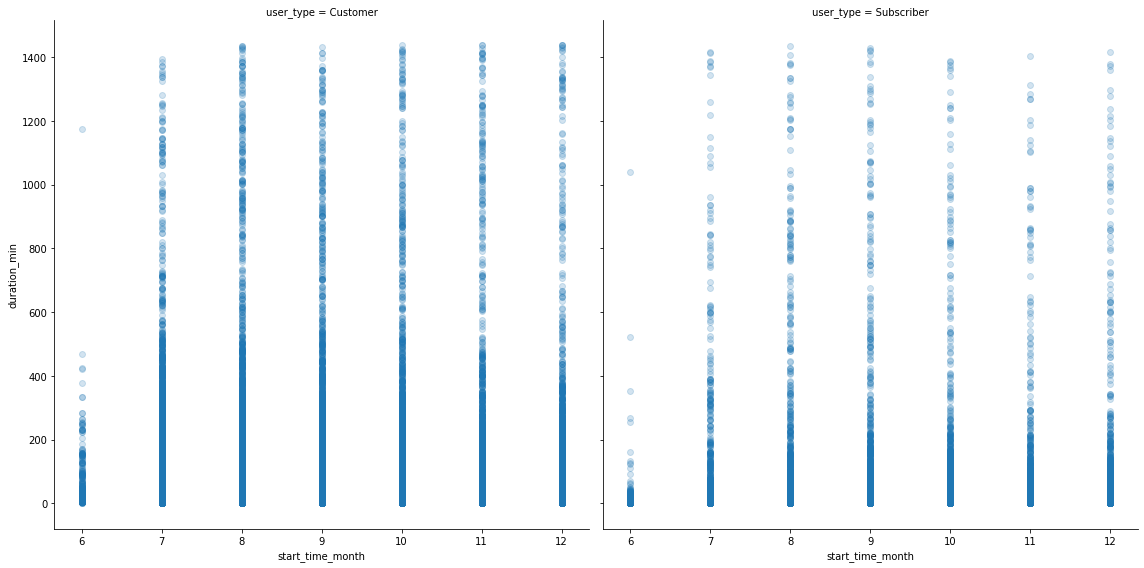

In [39]:
type = sb.FacetGrid(data =  df, col = 'user_type', size = 8, col_wrap = 2)
type.map(sb.regplot, 'start_time_month', 'duration_min', y_jitter = 0.04, fit_reg = False,scatter_kws = {'alpha' : 1/5});

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> there is agood correlation between end and start longitude

### Were there any interesting or surprising interactions between features?

> although subscribers are more than customers, customers make longer trips

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!